<a href="https://colab.research.google.com/github/ashisaxena710/LetsGrowMore/blob/main/Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flowers Classification**


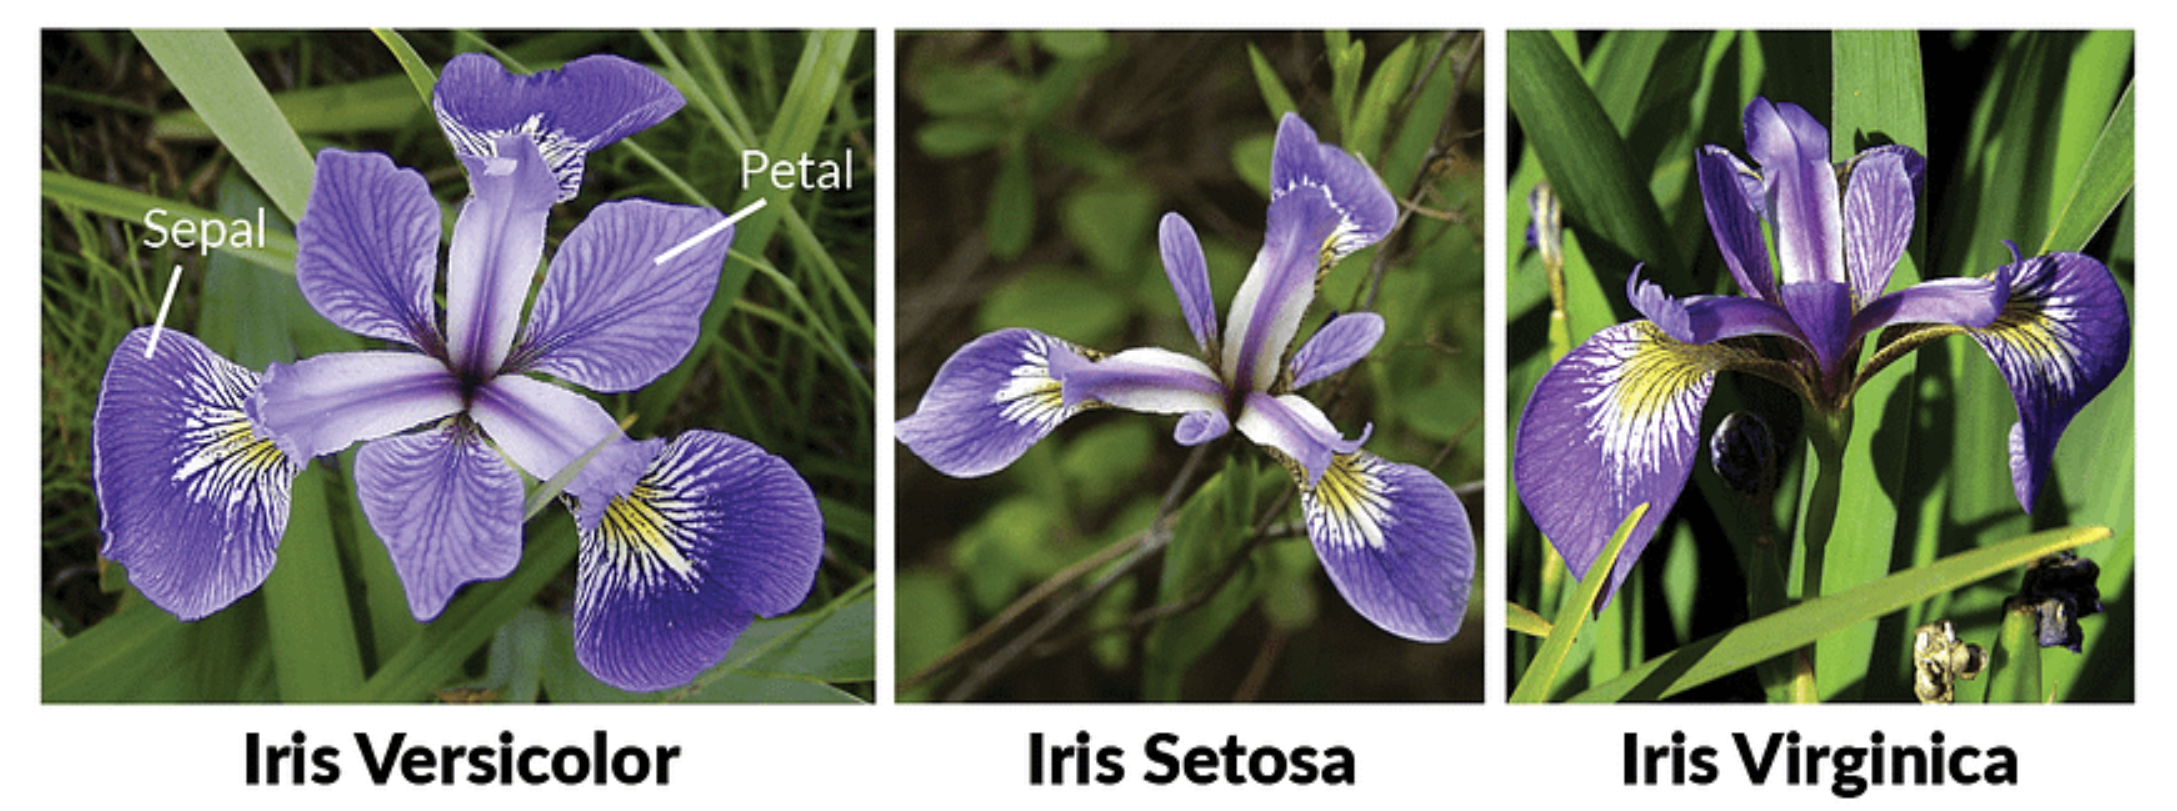

# ***Let's Begin !***

In [25]:
# Mounting the drive in our colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For training
from sklearn.model_selection import train_test_split

# For ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Ignoring future warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/Lets Grow More/Iris Flower Classification/Iris_data.csv")

In [29]:
# Let us check the first few rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Number of rows and columns
print(f"The dataset contain {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contain 150 rows and 6 columns.


In [31]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
# Dropping the Id column
df=df.drop(columns=['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
# Let us check for missing values/ null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Great! No null values.

In [34]:
# Dataset summary
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization

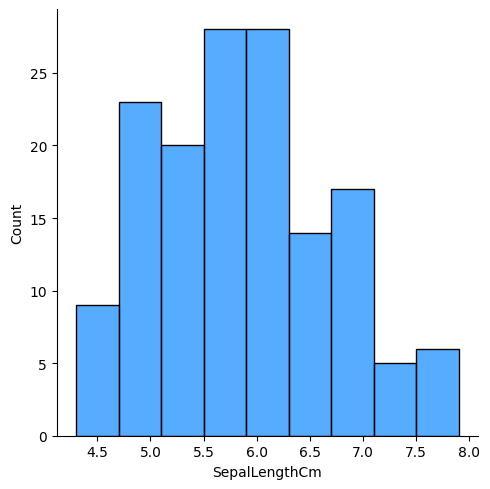

In [36]:
# Frequency distribution of column SepalLengthCm
sns.displot(df['SepalLengthCm'],color='dodgerblue')

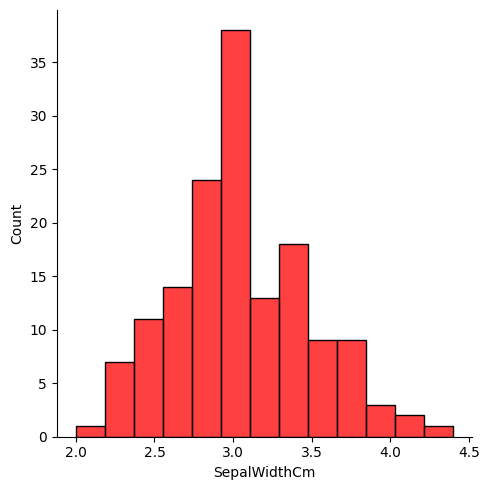

In [37]:
# Frequency distribution of column SepalWidthCm
sns.displot(df['SepalWidthCm'],color='red')

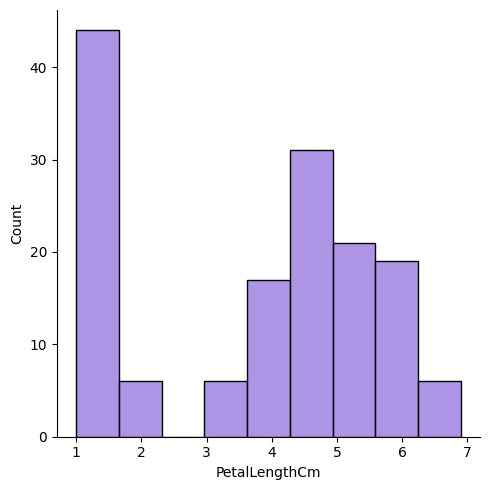

In [38]:
# Frequency distribution of column PetalLengthCm
sns.displot(df['PetalLengthCm'],color='mediumpurple')

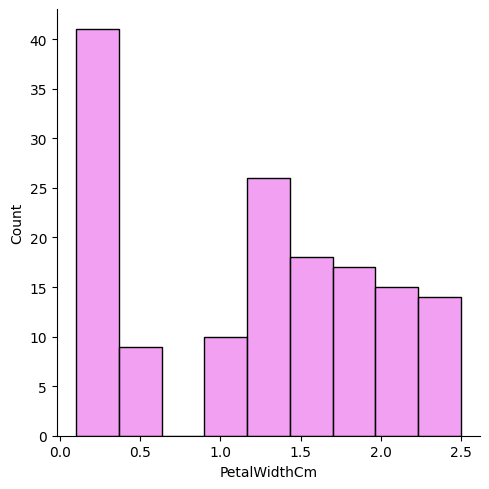

In [39]:
# Frequency distribution of column PetalWidthCm
sns.displot(df['PetalWidthCm'],color='violet')

In [40]:
# Scatterplot
color_palette = ['#66CC66', '#3399FF', '#FF66B2']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

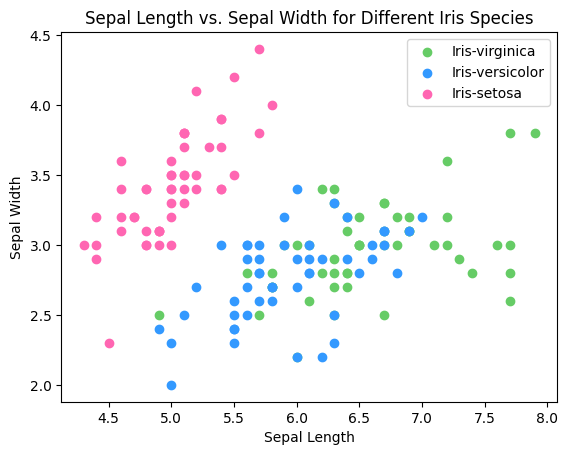

In [41]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = color_palette[i], label = species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs. Sepal Width for Different Iris Species")
plt.legend()

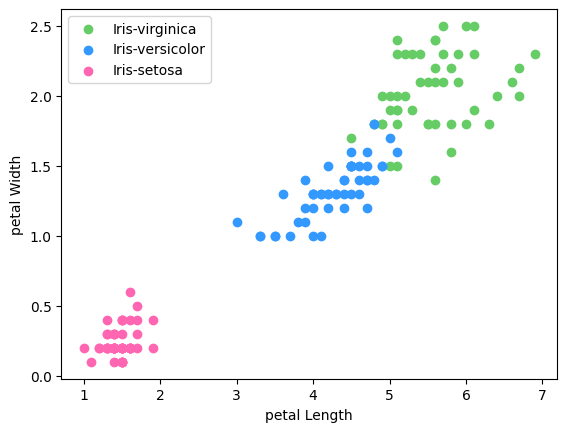

In [42]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color_palette[i], label = species[i])

plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

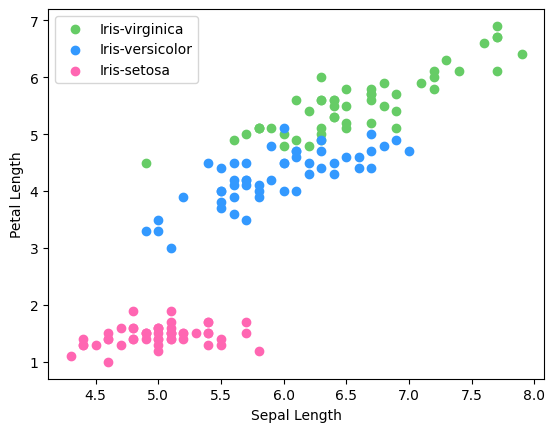

In [43]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color_palette[i], label = species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

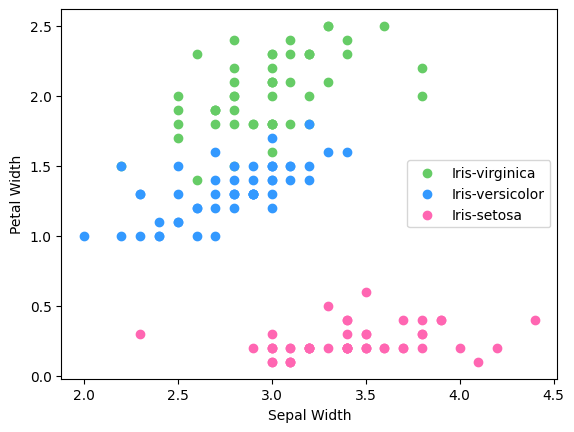

In [44]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color_palette[i], label = species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Training Data


In [45]:
# X-->> Independent columns
# Y-->> Dependent columns
X = df.drop(columns=['Species'])
Y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [46]:
# Let us check shapes for training and testing set
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

## ML Model Implementation

### Logistic Regression

In [47]:
# Using Logistic Regression Model
model= LogisticRegression()

# fitting our data to the training set
model.fit(x_train,y_train)

# Calculating the accuracy
print("Accuracy of the model:",model.score(x_test,y_test)*100)

Accuracy of the model: 95.55555555555556


### Decision Tree

In [48]:
# Using Decision Tree Model
model= DecisionTreeClassifier()

# fitting our data to the training set
model.fit(x_train,y_train)

# Calculating the accuracy
print("Accuracy of the model:",model.score(x_test,y_test)*100)

Accuracy of the model: 95.55555555555556


### K-Nearest Neighbors

In [49]:
# Using KNN Model
model= KNeighborsClassifier()

# fitting our data to the training set
model.fit(x_train,y_train)

# Calculating the accuracy
print("Accuracy of the model:",model.score(x_test,y_test)*100)

Accuracy of the model: 95.55555555555556
